# Merge intervals

<div class="content__u3I1 question-content__JfgR"><div><p>Given a collection of intervals, merge all overlapping intervals.</p>

<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> intervals = [[1,3],[2,6],[8,10],[15,18]]
<strong>Output:</strong> [[1,6],[8,10],[15,18]]
<strong>Explanation:</strong> Since intervals [1,3] and [2,6] overlaps, merge them into [1,6].
</pre>

<p><strong>Example 2:</strong></p>

<pre><strong>Input:</strong> intervals = [[1,4],[4,5]]
<strong>Output:</strong> [[1,5]]
<strong>Explanation:</strong> Intervals [1,4] and [4,5] are considered overlapping.</pre>

<p><strong>NOTE:</strong>&nbsp;input types have been changed on April 15, 2019. Please reset to default code definition to get new method signature.</p>

<p>&nbsp;</p>
<p><strong>Constraints:</strong></p>

<ul>
	<li><code>intervals[i][0] &lt;= intervals[i][1]</code></li>
</ul>
</div></div>

In [29]:
'''
IDEA: 최종 시작점과 끝점을 구간이 끊길 때까지 유지하며 업데이트 하자
1. last start와 last end 초기화. 첨에는 무조건 구간이 끊긴다고 가정하므로 -1로 준다
1. 리스트를 순회하면서 현재 start, end를 받는다
2. 만약 구간이 끊긴다면?
    2-1. 기존 최종 시작점과 끝점을 넘겨준다
    2-2. 새로운 최종 시작점을 현재 시작점으로 업데이트
3. 최종 끝점을 현재 끝점과 비교해서 더 큰 쪽을 선택
4. 맨 끝에서도 구간이 끊겨야 하므로 마지막에 inf를 추가
'''
def solution(intervals):
    intervals = sorted(intervals, key=lambda x: x[0])
    intervals.append([float("inf"), float("inf")])

    last_start, last_end = -1, -1
    result = []

    for start, end in intervals:    
        if start > last_end:
            result.append([last_start, last_end])
            last_start = start

        last_end = max(last_end, end)
    
    return result[1:]

[[1, 4], [2, 3], [inf, inf]]


[[1, 4]]

# 쿼드 트리 뒤집기

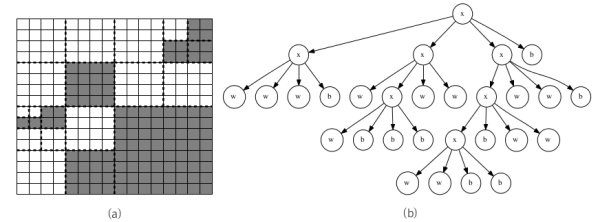

대량의 좌표 데이터를 메모리 안에 압축해 저장하기 위해 사용하는 여러 기법 중 쿼드 트리(quad tree)란 것이 있습니다. 주어진 공간을 항상 4개로 분할해 재귀적으로 표현하기 때문에 쿼드 트리라는 이름이 붙었는데, 이의 유명한 사용처 중 하나는 검은 색과 흰 색밖에 없는 흑백 그림을 압축해 표현하는 것입니다. 쿼드 트리는 2N × 2N 크기의 흑백 그림을 다음과 같은 과정을 거쳐 문자열로 압축합니다.

이 그림의 모든 픽셀이 검은 색일 경우 이 그림의 쿼드 트리 압축 결과는 그림의 크기에 관계없이 b가 됩니다.
이 그림의 모든 픽셀이 흰 색일 경우 이 그림의 쿼드 트리 압축 결과는 그림의 크기에 관계없이 w가 됩니다.
모든 픽셀이 같은 색이 아니라면, 쿼드 트리는 이 그림을 가로 세로로 각각 2등분해 4개의 조각으로 쪼갠 뒤 각각을 쿼드 트리 압축합니다. 이때 전체 그림의 압축 결과는 x(왼쪽 위 부분의 압축 결과)(오른쪽 위 부분의 압축 결과)(왼쪽 아래 부분의 압축 결과)(오른쪽 아래 부분의 압축 결과)가 됩니다. 예를 들어 그림 (a)의 왼쪽 위 4분면은 xwwwb로 압축됩니다.
그림 (a)와 그림 (b)는 16×16 크기의 예제 그림을 쿼드 트리가 어떻게 분할해 압축하는지를 보여줍니다. 이때 전체 그림의 압축 결과는 xxwww bxwxw bbbww xxxww bbbww wwbb가 됩니다.

쿼드 트리로 압축된 흑백 그림이 주어졌을 때, 이 그림을 상하로 뒤집은 그림 을 쿼드 트리 압축해서 출력하는 프로그램을 작성하세요.

입력
첫 줄에 테스트 케이스의 개수 C (C≤50)가 주어집니다. 그 후 C줄에 하나씩 쿼드 트리로 압축한 그림이 주어집니다. 모든 문자열의 길이는 1,000 이하이며, 원본 그림의 크기는 220 × 220 을 넘지 않습니다.

출력
각 테스트 케이스당 한 줄에 주어진 그림을 상하로 뒤집은 결과를 쿼드 트리 압축해서 출력합니다.

예제 입력
```
4
w
xbwwb
xbwxwbbwb
xxwwwbxwxwbbbwwxxxwwbbbwwwwbb
```
예제 출력

```
w
xwbbw
xxbwwbbbw
xxwbxwwxbbwwbwbxwbwwxwwwxbbwb
```

In [40]:
'''
2사분면 | 1사분면          3사분면 | 4사분면
-----------------   ->     -----------------
3사분면 | 4사분면          2사분면 | 1사분면

2134 -> 3421

1. 매 번 pop할거라서 빨랐으면 하는 맘에 입력을 deque로 만듦
2. 현재 입력에서 맨 앞을 뽑아서 확인
    2-1. w 또는 b면 바로 리턴
    2-2. x이면 현재 입력을 x2134 -> x3421로 바꿔서 리턴

'''
def test_case():
    yield '4'
    yield 'w'
    yield 'xbwwb'
    yield 'xbwxwbbwb'
    yield 'xxwwwbxwxwbbbwwxxxwwbbbwwwwbb'

def input():
    return next(G)

G = test_case()

import sys
from collections import deque
# input = sys.stdin.readline

def recursion(x):
    if not x:
        return ''
    
    token = x.popleft()

    if token != 'x':
        return token
    
    quad_2 = recursion(x)
    quad_1 = recursion(x)
    quad_3 = recursion(x)
    quad_4 = recursion(x)
        
    return token + quad_3 + quad_4 + quad_2 + quad_1


for _ in range(int(input())):
    x = deque(input())
    print(recursion(x))

w
w
xwbbw
xxbwwbbbw
